<a href="https://colab.research.google.com/github/mimingfikriac/SSD_CovidStressDataAnalysis/blob/main/SSD_Covid_Stress_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Membaca file csv dan mengubahnya ke dataframe

In [ ]:
import pandas as pd
!gdown --id "1eKAsgrSnsPi4FIAR1vLITAnNDw6ae-yp"
df = pd.read_csv("COVIDiSTRESS_May_30_cleaned_final (1).csv", encoding = 'latin-1')


/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1eKAsgrSnsPi4FIAR1vLITAnNDw6ae-yp
To: /content/COVIDiSTRESS_May_30_cleaned_final (1).csv
100% 90.3M/90.3M [00:02<00:00, 32.7MB/s]


<ipython-input-1-c345a8a04a11>:3: DtypeWarning: Columns (55,56,57,58,59,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("COVIDiSTRESS_May_30_cleaned_final (1).csv", encoding = 'latin-1')


Drop kolom-kolom yang tidak dipakai dalam perhitungan (karena banyak yang tidak mengisi/jawaban mengandung teks yang tidak dapat diolah secara numerik, kecuali identitas)

In [ ]:
df1=df.drop(df.loc[:, 'born_92':'PS_PTSD_5'].columns, axis=1)
df1=df1.drop(['Expl_Distress_txt', 'Expl_coping_txt','Final_open'], axis=1)
print(df1.shape)

(125306, 135)


Drop baris yang hanya mengisi identitas tapi tidak mengisi kuesioner sama sekali (walaupun sudah mengisi di bagian kolom yang sudah di drop)

In [ ]:
df2 = df1.dropna(subset=df1.columns[22:126], how='all')
print(df2.shape)

(116242, 135)


Ganti nilai 99 (Doesn't apply to my current situation) pada section Expl_Distress_X dengan nilai 1 (Karena responden tidak akan merasa stress apabila tidak merasa adanya hubungan antara dirinya dengan pertanyaan)

In [ ]:
df2.loc[:, 'Expl_Distress_1':'Expl_Distress_24'] = df2.loc[:, 'Expl_Distress_1':'Expl_Distress_24'].replace({99: 1})

<ipython-input-4-0d3d58de7dc7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'Expl_Distress_1':'Expl_Distress_24'] = df2.loc[:, 'Expl_Distress_1':'Expl_Distress_24'].replace({99: 1})


Reverse skala data untuk pertanyaan dengan skala terbalik di section masing-masing

In [ ]:
import numpy as np
df_reverse = df2.copy()
ganti = ['Scale_PSS10_UCLA_4','Scale_PSS10_UCLA_5','Scale_PSS10_UCLA_7','Scale_PSS10_UCLA_8','Compliance_4','Compliance_6']
for kolom in ganti:
  df_reverse[kolom] = np.max(df2[kolom]) - df2[kolom] + np.min(df2[kolom])

Drop 9 kolom terakhir yang memuat statistika deskriptif dari setiap observasi dan section bawaan dari data (tidak lagi relevan karena proses cleaning). dan menggantinya dengan nilai rata-rata dari setiap section untuk setiap observasi.

In [ ]:
df_reverse=df_reverse.drop(df.loc[:, 'PSS10_avg':'Scale_UCLA_TRI_avg'].columns, axis=1)
print(df_reverse.shape)

(116242, 126)


In [ ]:
df_clean=df_reverse.copy()
avg_cols = {
    'Scale_PSS10_avg':['Scale_PSS10_UCLA_1','Scale_PSS10_UCLA_10'],
    'Scale_SLON_avg':['Scale_SLON_1','Scale_SLON_3'],
    'OECD_people_avg':['OECD_people_1','OECD_people_2'],
    'OECD_insititutions_avg':['OECD_insititutions_1','OECD_insititutions_6'],
    'OECD_avg':['OECD_people_1','OECD_insititutions_6'],
    'Corona_concerns_avg':['Corona_concerns_1','Corona_concerns_5'],
    'Compliance_avg':['Compliance_1','Compliance_6'],
    'BFF_avg':['BFF_15_1','BFF_15_15'],
    'Expl_Distress_avg':['Expl_Distress_1','Expl_Distress_24'],
    'SPS_avg':['SPS_1','SPS_10'],
    'Expl_Coping_avg':['Expl_Coping_1','Expl_Coping_16'],
    'Expl_media_avg':['Expl_media_1','Expl_media_6']
    }
for cols in list(avg_cols.keys()):
   df_clean[cols] = df_reverse.loc[:, avg_cols[cols][0]:avg_cols[cols][1]].mean(axis=1)

print(df_clean.shape)

(116242, 138)


Menghitung matriks korelasi dari data

In [ ]:
#correlation_matrix = df_clean.corr(numeric_only=True)

Mencari pasangan-pasangan fitur dengan korelasi tinggi

In [ ]:
# Membuat mask untuk menghiraukan entri diagonal
#mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Mencari pasangan yang mempunyai korelasi kuat (baik negatif <-0.6 maupun positif >0.6)
#strong_pairs = [(i,j) for i in range(correlation_matrix.shape[0]) for j in range(i+1, correlation_matrix.shape[1]) if correlation_matrix.iloc[i, j] > 0.6 or correlation_matrix.iloc[i, j] < -0.6]

# Tampilkan Pasangan-Pasangannya
#for i, j in strong_pairs:
#    if correlation_matrix.columns[i][0:4] == correlation_matrix.columns[j][0:4] and correlation_matrix.columns[j][-3:] == 'avg':
#        continue
#    else:
#        print(f"{correlation_matrix.columns[i]} dan {correlation_matrix.columns[j]} mempunyai korelasi sebesar {correlation_matrix.iloc[i, j]}")

Mengambil subset data dari anggota G7. Anggota G7 dikelompokkan menjadi 3 blok negara
1. North America (US, Canada)
2. EU (UK, Italy, France, Germany)
3. Japan

Karena observasi france terlalu banyak (12000 baris), maka dilakukan stratified sampling berdasarkan demografi edukasi sebanyak 10% dan memasukannya dalam kelompok EU.

In [ ]:
df_clean_NA = df_clean[df_clean['Country'].isin(['United States','Canada'])]
df_clean_JP = df_clean[df_clean['Country'] == 'Japan']

df_clean_FR = pd.DataFrame()
for edu in df_clean['Dem_edu'].unique():
  df_clean_FR = df_clean_FR.append(df_clean[(df_clean['Country'] == 'France') & (df_clean['Dem_edu'] == edu)].sample(frac=0.09,random_state=42))

df_clean_EU = pd.concat([df_clean[df_clean['Country'].isin(['United Kingdom','Italy','Germany'])],df_clean_FR])

<ipython-input-11-46d0f425bdc2>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clean_FR = df_clean_FR.append(df_clean[(df_clean['Country'] == 'France') & (df_clean['Dem_edu'] == edu)].sample(frac=0.09,random_state=42))
<ipython-input-11-46d0f425bdc2>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clean_FR = df_clean_FR.append(df_clean[(df_clean['Country'] == 'France') & (df_clean['Dem_edu'] == edu)].sample(frac=0.09,random_state=42))
<ipython-input-11-46d0f425bdc2>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clean_FR = df_clean_FR.append(df_clean[(df_clean['Country'] == 'France') & (df_clean['Dem_edu'] == edu)].sample(frac=0.09,random_state=42))
<ipython-input-11-46d0f425bdc2>:6: FutureWarning: The frame.a

In [ ]:
#!pip install fitter

Mencari distribusi skor stress dari blok north america

In [ ]:
#from fitter import Fitter, get_common_distributions, get_distributions
#data = df_clean_NA["Scale_PSS10_avg"].values
#f = Fitter(data)
#f.fit()
#f.summary()

Mencari distribusi skor stress dari blok Japan


In [ ]:
#data = df_clean_JP["Scale_PSS10_avg"].values
#f = Fitter(data)
#f.fit()
#f.summary()

Plot bar chart untuk melihat distribusi data dari 3 blok negara berdasarkan fitur PSS10_avg, SLON_avg dan Expl_Distress_avg

In [ ]:
import numpy as np

df_clean_NA['Region'] = "N. America"
df_clean_EU['Region'] = "EU"
df_clean_JP['Region'] = "JP"

df_G7 = pd.concat([df_clean_NA, df_clean_EU, df_clean_JP])

<ipython-input-15-95c9f8197baa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_NA['Region'] = "N. America"
<ipython-input-15-95c9f8197baa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_JP['Region'] = "JP"


<ipython-input-16-33f015769f43>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df_G7.groupby('Region').mean()[['Scale_PSS10_avg', 'Scale_SLON_avg', 'Expl_Distress_avg']]


(11651, 139)


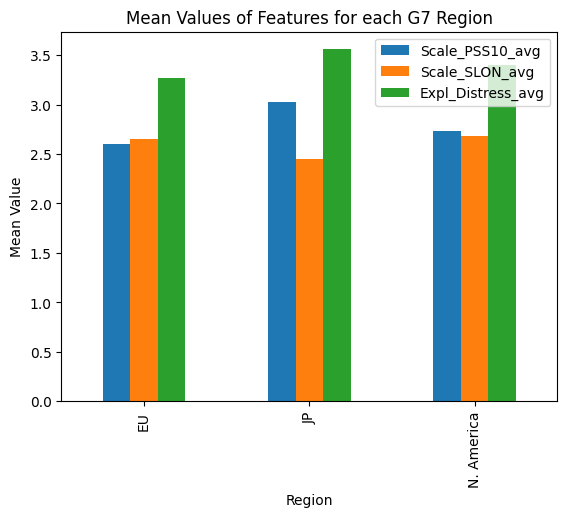

In [ ]:
#Drop baris yang mengandung NA pada Kolom yang akan dianalisis
df_G7 = df_G7.dropna(subset=['Scale_PSS10_avg','Scale_SLON_avg','Expl_Distress_avg'])
print(df_G7.shape)

#Buat Bar Chart
import matplotlib.pyplot as plt
grouped = df_G7.groupby('Region').mean()[['Scale_PSS10_avg', 'Scale_SLON_avg', 'Expl_Distress_avg']]

grouped.plot(kind='bar', stacked=False)

plt.xlabel('Region')
plt.ylabel('Mean Value')
plt.title('Mean Values of Features for each G7 Region')
plt.show()

Analisis deskriptif untuk data G7

In [ ]:
df_G7[['Scale_PSS10_avg','Expl_Distress_avg','Scale_SLON_avg']].describe()

,Scale_PSS10_avg,Expl_Distress_avg,Scale_SLON_avg
count,11651.000000,11651.000000,11651.000000
mean,2.794455,3.407407,2.577518
std,0.698779,0.751406,0.965596
min,1.000000,1.000000,1.000000
25%,2.300000,2.916667,2.000000
50%,2.800000,3.458333,2.333333
75%,3.200000,3.916667,3.333333
max,5.000000,6.000000,5.000000


Formulasi Hipotesis: "Dengan meningkatnya faktor stress (Expl_Distress_avg) maka stress score (Scale_PSS10_avg) juga meningkat."

Conduct Analisis Regresi Univariat dengan faktor stress sebagai x dan stress score sebagai y.

Pembagian data Train:Test = 9:1

Persamaan: y=b0+b1x

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

y = df_G7[['Scale_PSS10_avg']]
x = df_G7[['Expl_Distress_avg']]

# Split the data into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

# Create a Linear Regression object
regressor = LinearRegression()

# Train the model using the training sets
regressor.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regressor.predict(x_test)

print('Intercept: \n', regressor.intercept_)
# The coefficients
print('Coefficients: \n', regressor.coef_)
# The mean squared error
print('Mean squared error: %.2f' % metrics.mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % metrics.r2_score(y_test, y_pred))

Intercept: 
 [1.30732246]
Coefficients: 
 [[0.43748999]]
Mean squared error: 0.36
Coefficient of determination: 0.20


Penjelasan Hasil Regresi:
Persamaan Regresi Linier:
y=Intercept+Coefficients(x)

y=1.30732246+0.43748999(x)

Coefficents:
Menjelaskan seberapa besar perubahan stress score seiring dengan perubahan faktor stress, nilai 0.43748999 menunjukan bahwa setiap kenaikan faktor stress sebanyak 1, maka stress score akan ikut naik sebesar 0.43748999. ini menjawab hipotesis  "Dengan meningkatnya faktor stress (Expl_Distress_avg) maka stress score (Scale_PSS10_avg) juga meningkat." (Hipotesis Diterima)

Mean Square Error:
Menjelaskan secara rata2 seberapa jauh setiap prediksi yang dihasilkan model dari nilai stress score yang sebenarnya. Dengan skala PSS10_avg dari 1 sampai 5. Nilai 0.36 menyatakan secara rata2 prediksi meleset sebesar 0.36 poin dari nilai asli. Maka performa model bisa dibilang cukup baik. (tapi tidak maksimal karena alasan yang akan dijelaskan kemudian)

Coefficient of Determination (R2 Score):
Menjelaskan seberapa banyak varian dalam stress score bisa dijelaskan dengan baik oleh faktor stress, nilai 0.2 menyatakan faktor stress hanya bisa menjelaskan 20% varian dalam stress score. Yang berarti masih ada variabel lain yang secara signifikan bisa menjelaskan varian dalam stress score.

Pengujian Hipotesis dengan menggunakan Kruskal wallis, untuk mengecek apakah ada perbedaan yang signifikan di Scale_PSS10_avg, Expl_Distress_avg, Scale_SLON_avg, antara 3 blok negara.
Hipotesis H0 : Tidak ada perbedaan yang signifikan dalam di antara ketiga blok negara.
Hipotesis H1 :  Terdapat  perbedaan yang signifikan dalam di antara ketiga blok negara.
level of significance = 0.05

In [ ]:
import numpy as np
from scipy.stats import kruskal

# df2 = df1.dropna(subset=df1.columns[22:31], how='all')
# print(df2.shape)

data_NA = {
    "PSS10_UCLA_avg": df_clean_NA['Scale_PSS10_avg'].dropna(),
    "SLON_avg": df_clean_NA['Scale_SLON_avg'].dropna(),
    "Distress_avg": df_clean_NA['Expl_Distress_avg'].dropna()}
data_JP = {
    "PSS10_UCLA_avg":df_clean_JP['Scale_PSS10_avg'].dropna(),
    "SLON_avg": df_clean_JP['Scale_SLON_avg'].dropna(),
    "Distress_avg": df_clean_JP['Expl_Distress_avg'].dropna()}
data_EU = {
    "PSS10_UCLA_avg": df_clean_EU['Scale_PSS10_avg'].dropna(),
    "SLON_avg":df_clean_EU['Scale_SLON_avg'].dropna(),
    "Distress_avg": df_clean_EU['Expl_Distress_avg'].dropna()}

for questionnaire in  data_NA.keys():
    print(f"Kruskal-Wallis Test for {questionnaire}:")
    groups = [data_NA[questionnaire], data_JP[questionnaire], data_EU[questionnaire]]
    statistic, p_value = kruskal(*groups)
    print("Statistic:", statistic)
    print("P-Value:", p_value)
    if p_value < 0.05:
        print(f"There are significant differences in {questionnaire} among the three countries blocks.\n")
    else:
        print(f"There are no significant differences in {questionnaire} among the three countries blocks.\n")


Kruskal-Wallis Test for PSS10_UCLA_avg:
Statistic: 1006.1840255189538
P-Value: 3.235303063386157e-219
There are significant differences in PSS10_UCLA_avg among the three countries blocks.

Kruskal-Wallis Test for SLON_avg:
Statistic: 158.18567008034296
P-Value: 4.4711391279181846e-35
There are significant differences in SLON_avg among the three countries blocks.

Kruskal-Wallis Test for Distress_avg:
Statistic: 407.25876583468704
P-Value: 3.6718306746485824e-89
There are significant differences in Distress_avg among the three countries blocks.



In [ ]:
import numpy as np
from scipy.stats import kruskal

# df2 = df1.dropna(subset=df1.columns[22:31], how='all')
# print(df2.shape)

data_NA = {
    "PSS10_UCLA_avg": df_clean_NA['Scale_PSS10_avg'].dropna(),
    "SLON_avg": df_clean_NA['Scale_SLON_avg'].dropna(),
    "Distress_avg": df_clean_NA['Expl_Distress_avg'].dropna()}

data_EU = {
    "PSS10_UCLA_avg": df_clean_EU['Scale_PSS10_avg'].dropna(),
    "SLON_avg":df_clean_EU['Scale_SLON_avg'].dropna(),
    "Distress_avg": df_clean_EU['Expl_Distress_avg'].dropna()}

for questionnaire in  data_NA.keys():
    print(f"Kruskal-Wallis Test for {questionnaire}:")
    #groups = [data_NA[questionnaire], data_JP[questionnaire], data_EU[questionnaire]]
    groups = [data_NA[questionnaire],data_EU[questionnaire]]
    statistic, p_value = kruskal(*groups)
    print("Statistic:", statistic)
    print("P-Value:", p_value)
    if p_value < 0.05:
        print(f"There are significant differences in {questionnaire} among the two countries blocks.\n")
    else:
        print(f"There are no significant differences in {questionnaire} among the two countries blocks.\n")

Kruskal-Wallis Test for PSS10_UCLA_avg:
Statistic: 55.61006589796265
P-Value: 8.836997529953198e-14
There are significant differences in PSS10_UCLA_avg among the three countries blocks.

Kruskal-Wallis Test for SLON_avg:
Statistic: 0.2232488117663379
P-Value: 0.6365755587182036
There are no significant differences in SLON_avg among the three countries blocks.

Kruskal-Wallis Test for Distress_avg:
Statistic: 48.15970263729015
P-Value: 3.928800605979648e-12
There are significant differences in Distress_avg among the three countries blocks.



In [ ]:
import numpy as np
from scipy.stats import kruskal

# df2 = df1.dropna(subset=df1.columns[22:31], how='all')
# print(df2.shape)

data_EU = {
    "PSS10_UCLA_avg": df_clean_NA['Scale_PSS10_avg'].dropna(),
    "SLON_avg": df_clean_NA['Scale_SLON_avg'].dropna(),
    "Distress_avg": df_clean_NA['Expl_Distress_avg'].dropna()}
data_JP = {
    "PSS10_UCLA_avg":df_clean_JP['Scale_PSS10_avg'].dropna(),
    "SLON_avg": df_clean_JP['Scale_SLON_avg'].dropna(),
    "Distress_avg": df_clean_JP['Expl_Distress_avg'].dropna()}


for questionnaire in  data_NA.keys():
    print(f"Kruskal-Wallis Test for {questionnaire}:")
    groups = [data_EU[questionnaire], data_JP[questionnaire]]
    statistic, p_value = kruskal(*groups)
    print("Statistic:", statistic)
    print("P-Value:", p_value)
    if p_value < 0.05:
        print(f"There are significant differences in {questionnaire} among the three countries blocks.\n")
    else:
        print(f"There are no significant differences in {questionnaire} among the three countries blocks.\n")

Kruskal-Wallis Test for PSS10_UCLA_avg:
Statistic: 300.13797789016854
P-Value: 3.0740480956550455e-67
There are significant differences in PSS10_UCLA_avg among the three countries blocks.

Kruskal-Wallis Test for SLON_avg:
Statistic: 94.28192957681146
P-Value: 2.7363699132214145e-22
There are significant differences in SLON_avg among the three countries blocks.

Kruskal-Wallis Test for Distress_avg:
Statistic: 86.72169843857873
P-Value: 1.2491870846253778e-20
There are significant differences in Distress_avg among the three countries blocks.



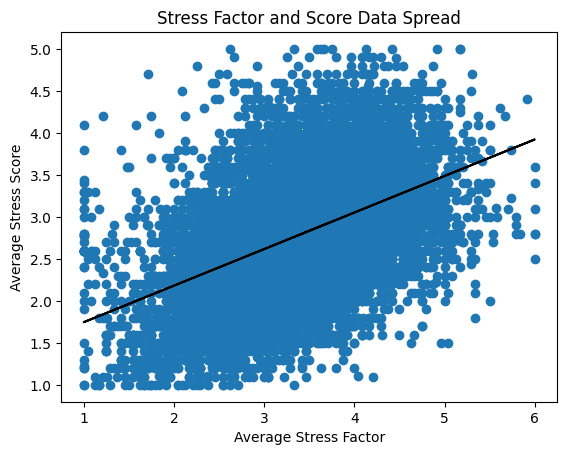

In [ ]:
x = df_G7['Expl_Distress_avg']
y = df_G7['Scale_PSS10_avg']

# Create scatter plot
plt.scatter(x, y)

# Calculate the trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Plot the trendline
plt.plot(x, p(x), color='black')

# Label the plot
plt.xlabel('Average Stress Factor')
plt.ylabel('Average Stress Score')
plt.title('Stress Factor and Score Data Spread')

# Display the plot
plt.show()
